In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
import shutil
shutil.rmtree("/kaggle/working/yolo")
shutil.rmtree("/kaggle/working/yolo1(sunny-night)")
shutil.rmtree("/kaggle/working/yolo2(rainny-day)")
shutil.rmtree("/kaggle/working/yolo3(rainny-night)")

# **Importing Neccessary libraries**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

2024-07-30 17:27:40.989577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 17:27:40.989721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 17:27:41.120440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(42)
tf.keras.utils.set_random_seed(42)

(822, 718, 3)

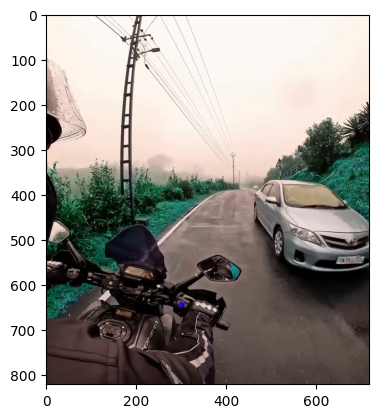

In [6]:
img=cv2.imread('/kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (100).jpg')
plt.imshow(img)
plt.show
img.shape

In [7]:
#Get number of files of .jpg format within a folder
import os
from glob import glob

train_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Day/*.jpg')
train_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Night/*.jpg')
train_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Day/*.jpg')
train_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Night/*.jpg')

val_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Day/*.jpg')
val_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Night/*.jpg')
val_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Day/*.jpg')
val_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Night/*.jpg')

# Setting up Dataframes of the images

In [8]:
file_paths = (train_Rainny_Day + train_Rainny_Night + train_Sunny_Day + train_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(train_Rainny_Day) + len(train_Rainny_Night)) + \
          ['Sunny'] * (len(train_Sunny_Day) + len(train_Sunny_Night))

time_of_day = ['Day'] * (len(train_Rainny_Day) + len(train_Sunny_Day)) + \
              ['Night'] * (len(train_Rainny_Night) + len(train_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
train_df = pd.DataFrame(data)
train_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
...,...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night


In [9]:
file_paths = (val_Rainny_Day + val_Rainny_Night + val_Sunny_Day + val_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(val_Rainny_Day) + len(val_Rainny_Night)) + \
          ['Sunny'] * (len(val_Sunny_Day) + len(val_Sunny_Night))

time_of_day = ['Day'] * (len(val_Rainny_Day) + len(val_Sunny_Day)) + \
              ['Night'] * (len(val_Rainny_Night) + len(val_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
val_df = pd.DataFrame(data)
val_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
...,...,...,...
195,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
196,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
197,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
198,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night


In [10]:
df = train_df

In [11]:
df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
...,...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night


In [12]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [13]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [14]:
train_weather=df.drop('period', axis=1)
train_period=df.drop('weather',axis=1)


In [15]:
train_weather

,filename,weather
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny


# Image Data Generators for the Resnet Training models

In [16]:
import matplotlib.image as mpimg
import os
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [17]:
import keras_cv
datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=True,
    rotation_range=2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    channel_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    # PARAMS TO EXPLORE
    validation_split=0.2,
    zoom_range=0.1,
    preprocessing_function= None
)

In [18]:
mytrain=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


In [19]:
mytrain2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


# Two Pretrained ResNet Model

In [20]:
base_model=tf.keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,  
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [21]:
base_model2=tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
)


In [22]:
base_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [23]:
base_model2.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [24]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [25]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [26]:
base_model.trainable = False#freezing
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(2,activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [27]:
base_model2.trainable = False#freezing
inputs2 = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x2 = base_model2(inputs2, training=False)
x2 = keras.layers.GlobalAveragePooling2D()(x2)
# A Dense classifier with a single unit (binary classification)
outputs2 = Dense(2,activation='softmax')(x2)
model2 = keras.Model(inputs2, outputs2)

In [28]:
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [29]:
model2.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [30]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

# Training of Both the ResNet Models

In [31]:
m1 = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5938 - loss: 0.7893  

I0000 00:00:1722360669.610603     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722360669.662136     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8624 - loss: 0.3366

W0000 00:00:1722360720.084595     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722360726.421170     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8635 - loss: 0.3342 - val_accuracy: 0.8882 - val_loss: 0.2900
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 713ms/step - accuracy: 0.9922 - loss: 0.0409 - val_accuracy: 0.9780 - val_loss: 0.0949
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 731ms/step - accuracy: 0.9988 - loss: 0.0215 - val_accuracy: 0.9721 - val_loss: 0.0959
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 721ms/step - accuracy: 0.9992 - loss: 0.0152 - val_accuracy: 0.9880 - val_loss: 0.0469
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 723ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9701 - val_loss: 0.0630
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 714ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9840 - val_loss: 0.0437
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 719ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9880 - val_loss: 0.0400
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 732ms/step - accuracy: 0.9998 - loss: 0.0045 - val_accuracy: 1.0000 -

In [32]:
m2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    verbose=1
)

Epoch 1/10
 2/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5156 - loss: 1.2583  

W0000 00:00:1722361205.531871     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/63 ━━━━━━━━━━━━━━━━━━━━ 7s 625ms/step - accuracy: 0.7036 - loss: 0.6956

W0000 00:00:1722361236.669857     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.7256 - loss: 0.6462

W0000 00:00:1722361245.821833     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 820ms/step - accuracy: 0.7291 - loss: 0.6384 - val_accuracy: 0.9461 - val_loss: 0.1941
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 712ms/step - accuracy: 0.9373 - loss: 0.2168 - val_accuracy: 0.9182 - val_loss: 0.2512
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 720ms/step - accuracy: 0.9406 - loss: 0.1830 - val_accuracy: 0.9860 - val_loss: 0.0596
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 717ms/step - accuracy: 0.9522 - loss: 0.1644 - val_accuracy: 0.9701 - val_loss: 0.1242
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 729ms/step - accuracy: 0.9473 - loss: 0.1516 - val_accuracy: 0.9960 - val_loss: 0.0288
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 717ms/step - accuracy: 0.9441 - loss: 0.1524 - val_accuracy: 0.9621 - val_loss: 0.1402
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 714ms/step - accuracy: 0.9508 - loss: 0.1440 - val_accuracy: 0.9361 - val_loss: 0.1940
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 712ms/step - accuracy: 0.9328 - loss: 0.1680 - val_accuracy: 0.988

In [33]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [34]:
base_model2.trainable = True
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [35]:
mval = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1,
)

Epoch 1/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 57:18 55s/step - accuracy: 1.0000 - loss: 0.0481

W0000 00:00:1722361790.876324     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/63 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9922 - loss: 0.0368   

W0000 00:00:1722361836.004723     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.9940 - loss: 0.0301

W0000 00:00:1722361856.387701     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9941 - loss: 0.0299 - val_accuracy: 0.9820 - val_loss: 0.0346
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 727ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9920 - val_loss: 0.0240
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 739ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 0.9940 - val_loss: 0.0167
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 731ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9920 - val_loss: 0.0280
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 734ms/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9940 - val_loss: 0.0180


In [36]:
mval2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 43:42 42s/step - accuracy: 0.9688 - loss: 0.1699

W0000 00:00:1722362112.585327     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/63 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - accuracy: 0.9567 - loss: 0.1678  

W0000 00:00:1722362131.085778     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.9405 - loss: 0.1865

W0000 00:00:1722362169.721951     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9405 - loss: 0.1864 - val_accuracy: 0.9960 - val_loss: 0.0166
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 725ms/step - accuracy: 0.9372 - loss: 0.1848 - val_accuracy: 0.9960 - val_loss: 0.0121
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 731ms/step - accuracy: 0.9531 - loss: 0.1357 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 728ms/step - accuracy: 0.9444 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 728ms/step - accuracy: 0.9470 - loss: 0.1365 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 731ms/step - accuracy: 0.9604 - loss: 0.1168 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 724ms/step - accuracy: 0.9547 - loss: 0.1193 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 699ms/step - accuracy: 0.9625 - loss: 0.1060 - val_accuracy: 1.0000 

In [37]:
#Predictions
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def make_predictions(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds 

In [38]:
#time
def make_predictions2(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [39]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [40]:
weather_list[np.argmax(make_predictions("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))],period_list[np.argmax(make_predictions2("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


('Rainny', 'Day')

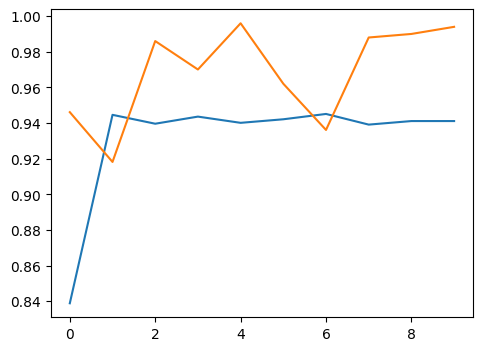

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])


plt.show()

In [42]:
model.save('rainny_sunny.h5')
model2.save('day_night.h5')

In [43]:
pd.set_option('display.max_colwidth', None)

In [44]:
val_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg,Rainny,Day
...,...,...,...
195,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (694).jpg,Sunny,Night
196,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (653).jpg,Sunny,Night
197,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (655).jpg,Sunny,Night
198,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (664).jpg,Sunny,Night


In [45]:
len(val_df)

200

In [46]:
true_time_labels = np.array(val_df[['period']])

In [47]:
true_time_label = []
for i in true_time_labels:
    if i == ['Day']:
        true_time_label.append(0)
    else:
        true_time_label.append(1)

In [48]:
len(true_time_label)

200

In [49]:
true_weather_labels = np.array(val_df[['weather']])
len(true_weather_labels)

200

In [50]:
true_weather_label = []
for i in true_weather_labels:
    if i == ['Rainny']:
        true_weather_label.append(0)
    else:
        true_weather_label.append(1)

In [51]:
len(true_weather_label)

200

In [52]:
filenames = np.array(val_df[['filename']])
filenames.flatten()
#filenames

array(['/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (699).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (668).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (671).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (658).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (662).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (693).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny

In [53]:
pred_time_labels = []
for i in filenames:
    pred_time_labels.append(np.argmax(make_predictions2(i[0])))
pred_time_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [54]:
pred_weather_labels = []
for i in filenames:
    pred_weather_labels.append(np.argmax(make_predictions(i[0])))
pred_weather_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

# Classification reports of the Two Resnets after Testing on unseen data

In [55]:
print(classification_report(true_weather_label, pred_weather_labels))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.87      0.78      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [56]:
print(classification_report(true_time_label, pred_time_labels))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       100
           1       1.00      0.69      0.82       100

    accuracy                           0.84       200
   macro avg       0.88      0.84      0.84       200
weighted avg       0.88      0.84      0.84       200



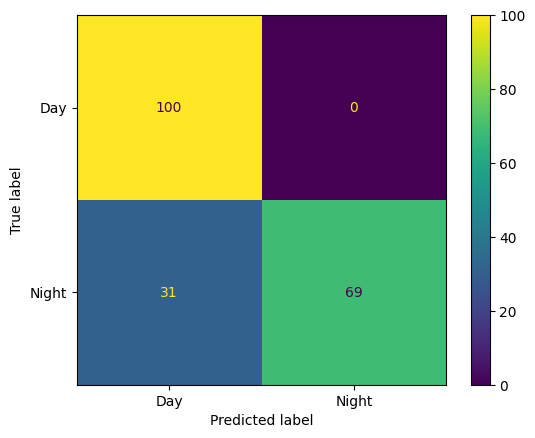

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_time_label, pred_time_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Day', 'Night'])
disp.plot()
plt.show()

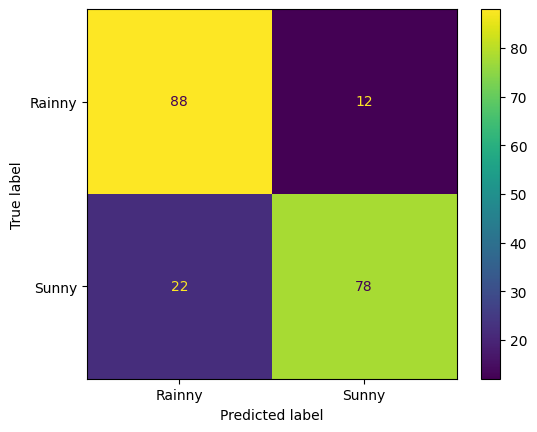

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_weather_label, pred_weather_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Rainny', 'Sunny'])
disp.plot()
plt.show()

In [75]:
!pip install numba

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [1]:
!rm -rf /kaggle/working/runs/*

# YOLO Object Detection Training

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.6/862.6 kB 22.8 MB/s eta 0:00:0000:01


In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
from ultralytics import YOLO

In [5]:
import torch
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# YOLO training on Vehicles of Sunny Weather and Daytime 

In [6]:
model_sunny_day = YOLO('yolov8x.pt')
result=model_sunny_day.train(data='/kaggle/input/yolo-dataset/sunny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/sunny-day.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]
2024-07-30 18:18:51,933	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-30 18:18:53,907	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Sunny/Day... 650 images, 1 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:03<00:00, 199.34it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Sunny is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 191.51it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      16.5G      2.167      2.524      1.594        224        640: 100%|██████████| 41/41 [00:58<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         50        535      0.328      0.336      0.331       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      16.2G      2.018      1.645      1.552        181        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50        535       0.29      0.422      0.288      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      16.5G      2.021      1.607      1.562        253        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50        535      0.574       0.29       0.26      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      15.5G      2.017      1.554      1.539        267        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50        535      0.529      0.281      0.334      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      15.7G      2.018      1.529      1.526        243        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.247       0.46      0.294      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      16.5G      1.985      1.432      1.516        208        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.325      0.345      0.284      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      16.2G      1.946      1.387      1.498        114        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         50        535      0.549      0.392      0.411      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      16.5G      1.935      1.373      1.499        326        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.702      0.298      0.404      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      16.2G      1.935      1.311        1.5        319        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         50        535      0.433      0.354      0.423      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20        16G      1.908      1.273      1.474        314        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.453       0.47      0.474      0.192


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      15.2G      1.822      1.148      1.415        106        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.348      0.371      0.383      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      16.5G      1.817      1.109      1.418        120        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.662      0.385       0.48      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      15.7G      1.796      1.078      1.409         90        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.659      0.486      0.545      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      16.1G      1.777      1.042      1.398         91        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.736      0.466      0.569       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20        16G      1.774      1.009      1.396         94        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.682      0.405      0.534      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      16.5G      1.739     0.9705      1.373        127        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.643      0.496      0.563      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.4G      1.723     0.9352      1.357         79        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.604      0.486      0.554      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20        13G      1.695     0.9087      1.347        104        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.623      0.522      0.547      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.4G      1.708     0.8812      1.354         97        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.765       0.49       0.59      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.1G      1.675     0.8799      1.332        120        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50        535      0.699      0.474      0.593       0.28



20 epochs completed in 0.329 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 68,136,087 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]


                   all         50        535      0.664      0.556       0.59      0.283
                   car         43        424      0.489      0.849      0.779      0.366
                  bike          4          5      0.934        0.8      0.906      0.474
                   bus         18         22      0.546        0.5      0.417      0.184
             minitruck         30         34       0.71      0.529      0.609      0.299
                 truck          7         22      0.659      0.527      0.534      0.192
                   van         25         28      0.645      0.131      0.294      0.184
Speed: 0.1ms preprocess, 97.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▃▂▁▃▂▂▄▄▄▆▄▆▇█▇▇▇▇██
metrics/mAP50-95(B),▂▁▁▂▂▁▄▃▄▄▃▅▆▇▆▇▇▇█▇
metrics/precision(B),▂▂▅▅▁▂▅▇▄▄▂▇▇█▇▆▆▆█▇
metrics/recall(B),▂▅▁▁▆▃▄▁▃▆▃▄▆▆▄▆▆▇▆█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▅▅▅▅▄▃▃▃▂▂▂▂▁▁▁


In [8]:
import shutil

source_path = "/kaggle/working/runs/detect/train"

destination_path = "/kaggle/working/yolo(sunny-day)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(sunny-day)'

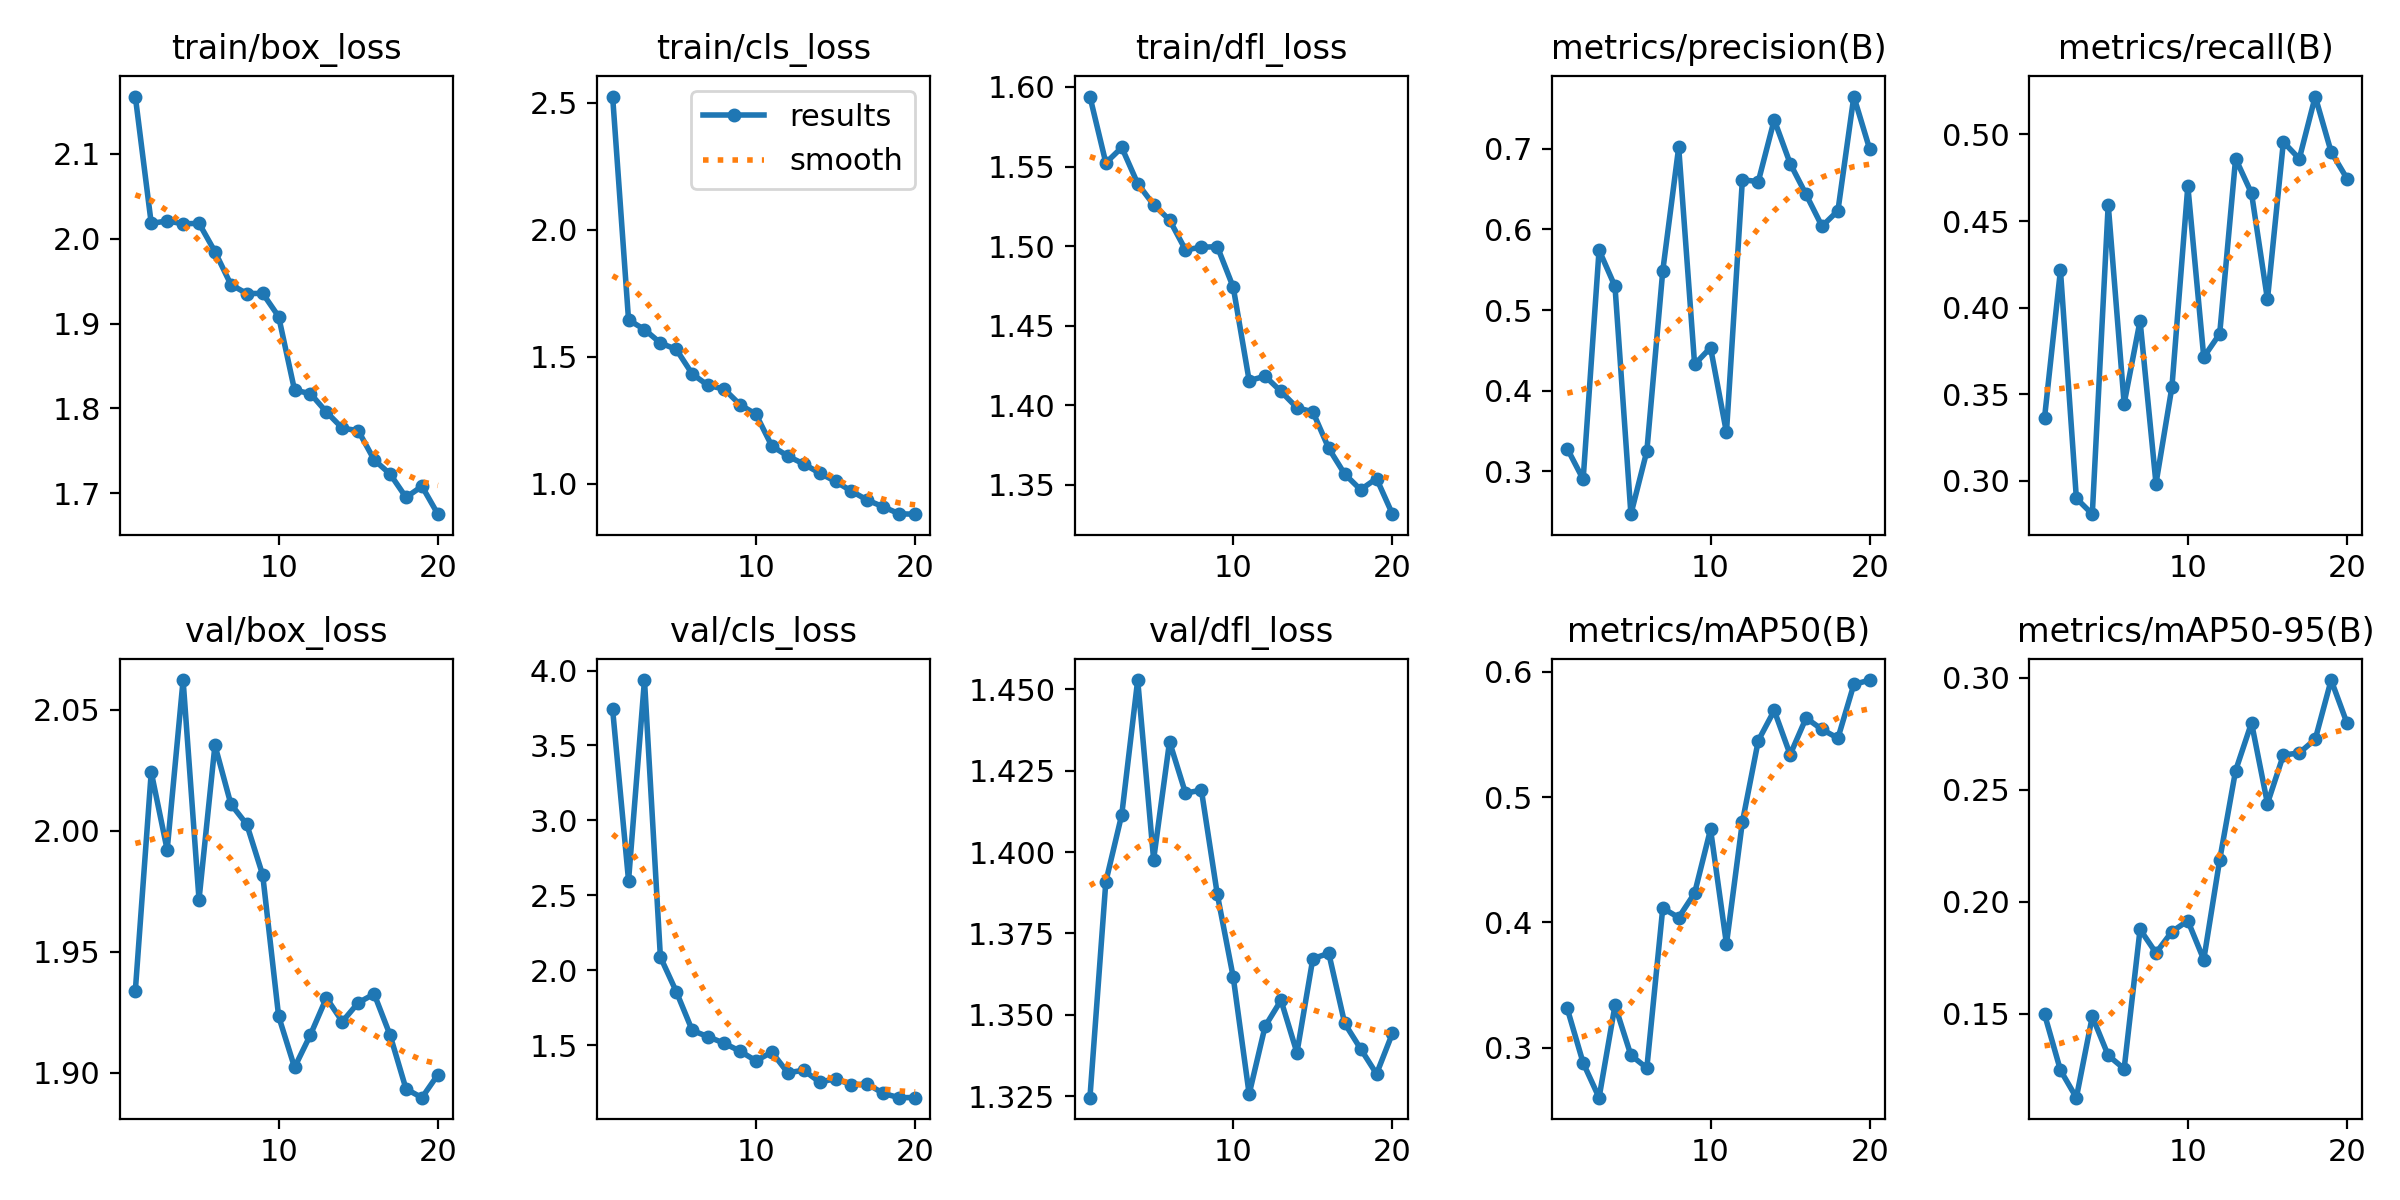

In [9]:
from PIL import Image
Image.open("/kaggle/working/yolo(sunny-day)/results.png")

In [10]:
import pandas as pd
pd.read_csv("/kaggle/working/yolo(sunny-day)/results.csv")

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.1674,2.52440,1.5940,0.32813,0.33632,0.33122,0.14982,1.9339,3.7404,1.3246,0.000191,0.000191,0.000191
1,2,2.0179,1.64490,1.5523,0.28989,0.42161,0.28775,0.12482,2.0242,2.5985,1.3909,0.000368,0.000368,0.000368
2,3,2.0209,1.60700,1.5620,0.57440,0.28996,0.25997,0.11256,1.9921,3.9364,1.4115,0.000525,0.000525,0.000525
3,4,2.0174,1.55410,1.5393,0.52932,0.28081,0.33366,0.14878,2.0622,2.0887,1.4528,0.000501,0.000501,0.000501
4,5,2.0181,1.52850,1.5260,0.24665,0.45951,0.29383,0.13140,1.9716,1.8572,1.3977,0.000472,0.000472,0.000472
5,6,1.9847,1.43200,1.5165,0.32489,0.34464,0.28369,0.12546,2.0353,1.5989,1.4339,0.000442,0.000442,0.000442
6,7,1.9459,1.38660,1.4977,0.54867,0.39243,0.41130,0.18765,2.0110,1.5564,1.4181,0.000413,0.000413,0.000413
7,8,1.9353,1.37270,1.4993,0.70193,0.29849,0.40377,0.17714,2.0026,1.5137,1.4190,0.000384,0.000384,0.000384
8,9,1.9355,1.31120,1.4997,0.43250,0.35416,0.42329,0.18665,1.9817,1.4605,1.3870,0.000355,0.000355,0.000355
9,10,1.9082,1.27350,1.4742,0.45333,0.47020,0.47422,0.19151,1.9234,1.3962,1.3616,0.000326,0.000326,0.000326


In [11]:
import cv2
import matplotlib.pyplot as plt

# Define a function to draw boxes
def draw_boxes(image, results):
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > 0.6:
            
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(image, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)


In [12]:
# Load the image
def make_boxes(model, image_path):
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)

    # Convert the image from BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (124).jpg: 384x640 18 cars, 1 bus, 238.2ms
Speed: 1.4ms preprocess, 238.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


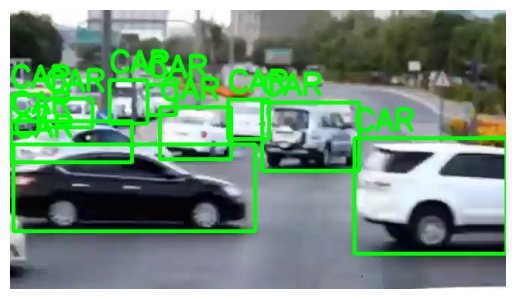

In [13]:
make_boxes(model_sunny_day, "/kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (124).jpg")

# YOLO training on Sunny Night Conditions

In [14]:
from ultralytics import YOLO

model_sunny_night = YOLO('yolov8x.pt')
result=model_sunny_night.train(data='/kaggle/input/yolo-dataset/sunny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/sunny-night.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

wandb: Currently logged in as: arka08652. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Sunny/Night... 650 images, 1 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:03<00:00, 208.91it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Sunny is not writeable, cache not saved.



train: Caching images (0.4GB RAM): 100%|██████████| 650/650 [00:02<00:00, 324.89it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 175.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.



val: Caching images (0.0GB RAM): 100%|██████████| 50/50 [00:00<00:00, 97.85it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      15.1G      2.007      2.993       1.76        107        640: 100%|██████████| 41/41 [00:55<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259       0.18      0.317      0.202     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.8G      1.902      1.965      1.687         78        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.533      0.191      0.217     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.7G      1.887      1.896      1.735         78        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.388       0.17      0.152     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.7G      1.882      1.701       1.72        125        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259      0.345       0.27      0.187      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      14.4G      1.859      1.644      1.704        109        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50        259      0.413      0.214      0.183     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20        15G      1.817      1.515      1.661         86        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50        259      0.324      0.259      0.284       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.5G      1.796       1.47      1.637         55        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50        259      0.437      0.259      0.275      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      14.7G      1.756      1.358      1.626        123        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50        259      0.687      0.229      0.249     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.6G      1.737      1.307      1.619        102        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50        259      0.421      0.269      0.337      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      14.6G      1.709      1.287       1.62        126        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50        259      0.593       0.25      0.255      0.105


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.5G      1.682      1.144      1.559         44        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50        259      0.487      0.329      0.326      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      14.7G      1.664      1.082      1.558         45        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50        259      0.373      0.307      0.343      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        15G      1.644       1.02      1.527         63        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50        259      0.371      0.363      0.355      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      14.1G      1.604     0.9794      1.495         52        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50        259        0.6      0.286      0.327      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.2G      1.596      0.944      1.484         35        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50        259      0.583      0.402       0.43      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      14.7G      1.557     0.8845      1.475         34        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         50        259      0.589      0.342      0.385      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        15G      1.541     0.8567      1.448         53        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50        259      0.567       0.32      0.373      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      14.6G      1.519      0.834      1.431         47        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         50        259      0.539      0.365      0.385      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.3G      1.488     0.8009      1.422         45        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50        259      0.602       0.36      0.426      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.7G      1.467     0.7783      1.405         47        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50        259      0.634      0.347      0.405      0.192



20 epochs completed in 0.326 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 68,138,013 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]


                   all         50        259      0.574      0.361      0.409        0.2
                   car         16         21      0.518      0.714      0.573      0.312
                  bike         45         70      0.377        0.6      0.474      0.212
                  auto         20         33      0.622      0.498      0.619      0.318
                 cycle         29         46      0.392      0.196      0.246     0.0887
             minitruck         24         24          1          0          0          0
                 truck         25         25      0.684       0.64      0.615      0.319
                  taxi         10         10          1      0.237      0.718      0.332
                  toto         28         30          0          0       0.03     0.0144
Speed: 0.1ms preprocess, 86.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▂▃▁▂▂▄▄▃▆▄▅▆▆▅█▇▇▇█▇
metrics/mAP50-95(B),▂▂▁▁▁▃▃▃▅▃▅▅▆▅▇▆▇▇██
metrics/precision(B),▁▆▄▃▄▃▅█▄▇▅▄▄▇▇▇▆▆▇▆
metrics/recall(B),▅▂▁▄▂▄▄▃▄▃▆▅▇▅█▆▆▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁▁


In [16]:
import shutil

source_path = "/kaggle/working/runs/detect/train2"

destination_path = "/kaggle/working/yolo(sunny-night)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(sunny-night)'

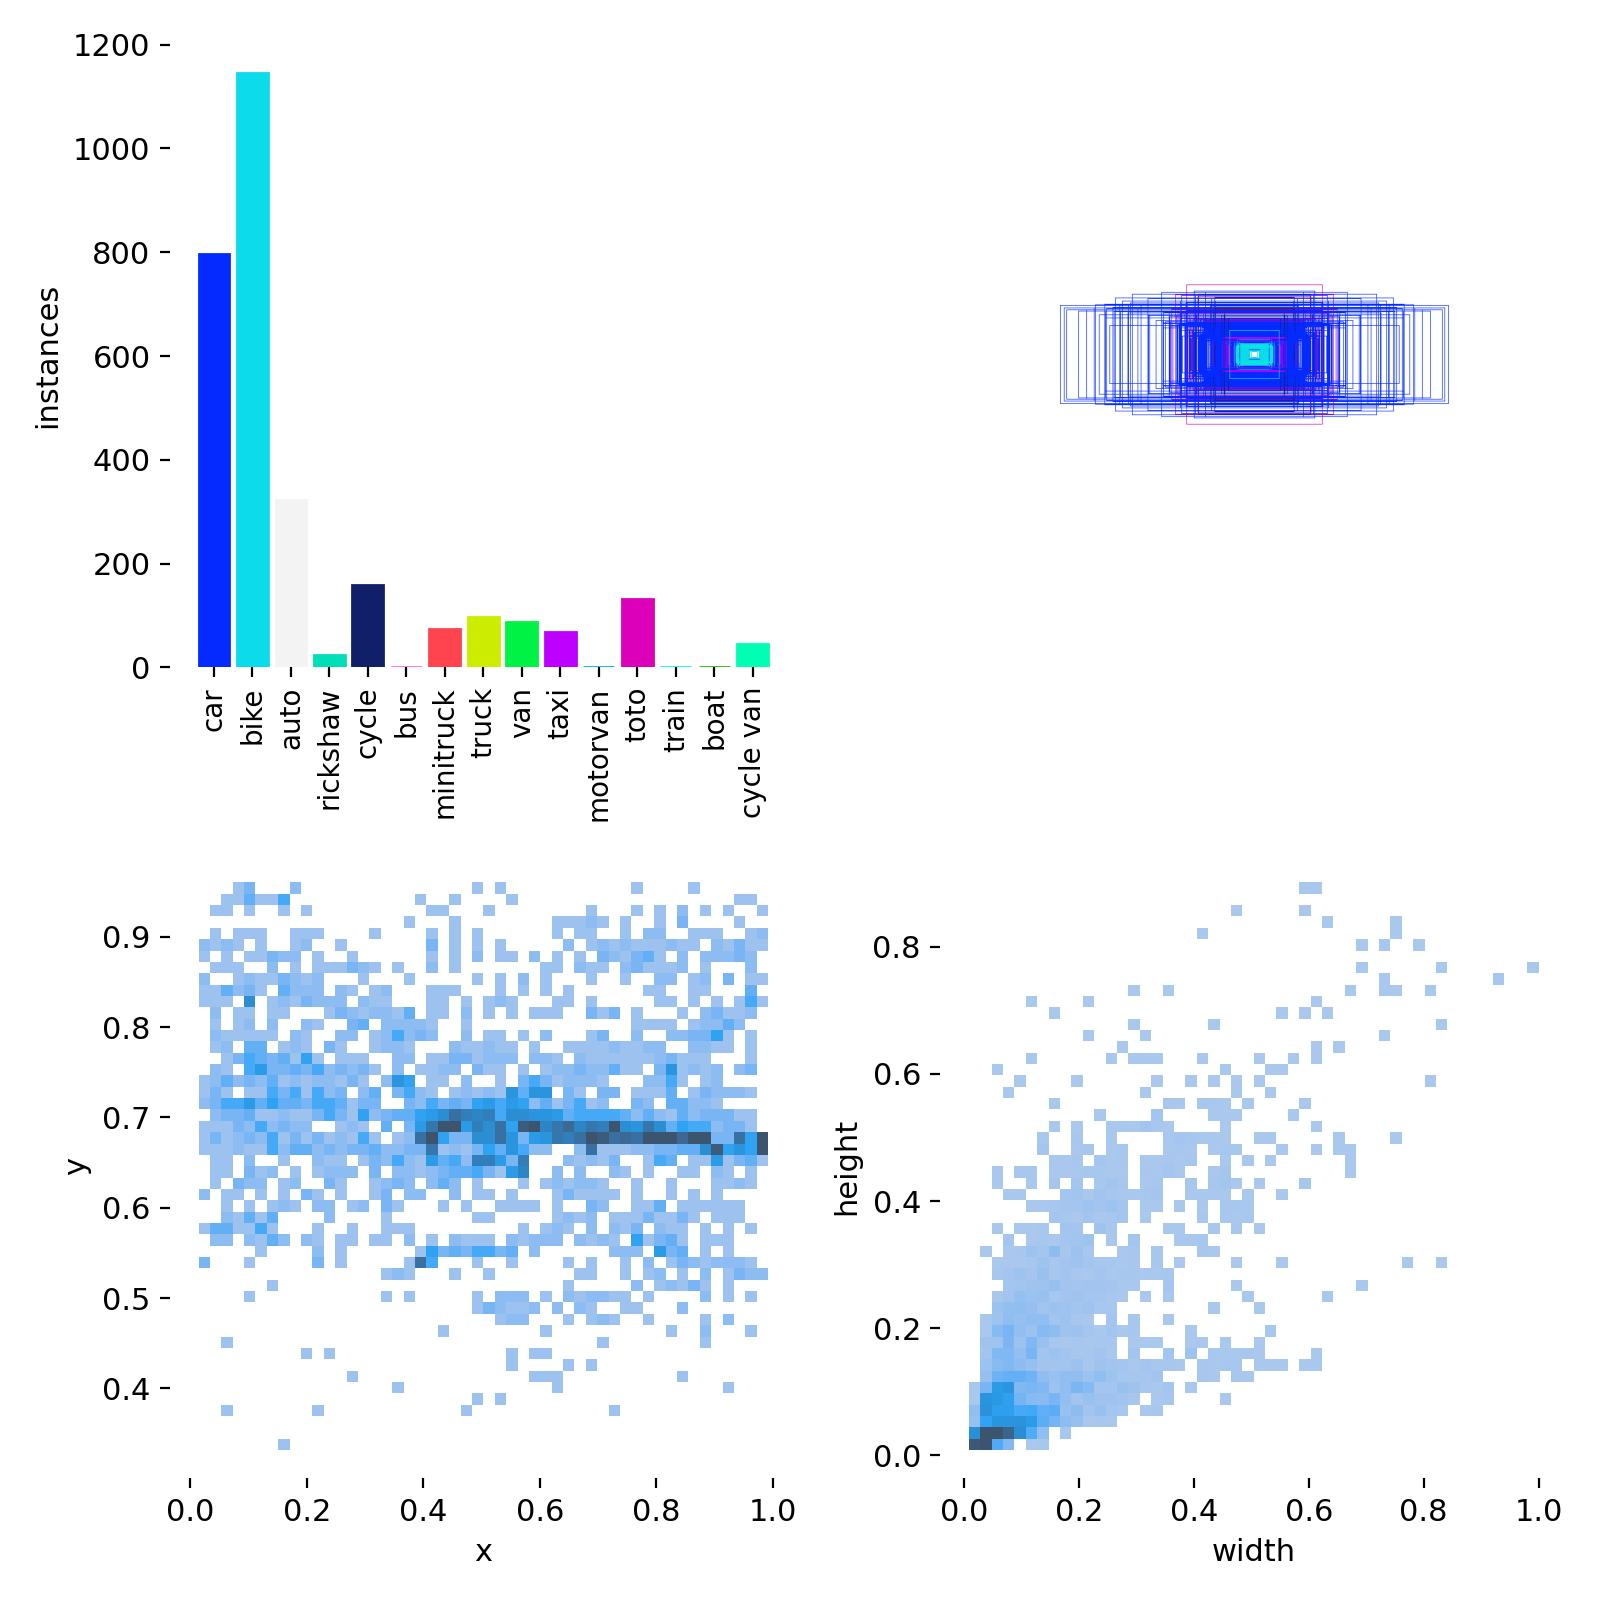

In [17]:
Image.open("/kaggle/working/yolo(sunny-night)/labels.jpg")

In [18]:
model_sunny_night = YOLO("/kaggle/working/yolo(sunny-night)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg: 640x384 3 cars, 84.0ms
Speed: 2.4ms preprocess, 84.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


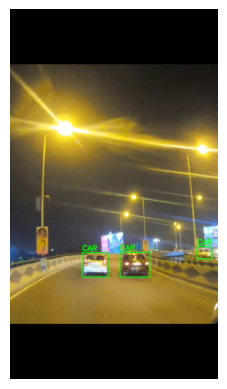

In [19]:
make_boxes(model_sunny_night, "/kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg")

# YOLO Training on Rainny Day Conditions

In [20]:
from ultralytics import YOLO

model_rainny_day = YOLO('yolov8x.pt')
result=model_rainny_day.train(data='/kaggle/input/yolo-dataset/rainny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/rainny-day.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Rainny/Day... 650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:03<00:00, 189.39it/s]

train: WARNING ⚠️ /kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (236).jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Rainny is not writeable, cache not saved.


train: Caching images (0.6GB RAM): 100%|██████████| 650/650 [00:02<00:00, 237.81it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 192.55it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



val: Caching images (0.1GB RAM): 100%|██████████| 50/50 [00:00<00:00, 127.95it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      16.5G      2.055      2.666      1.613        190        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         50        168       0.93      0.715      0.822      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.5G      1.908      1.542      1.514         82        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         50        168      0.763       0.59      0.693      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.4G      1.916      1.456      1.534        235        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         50        168      0.396      0.719      0.437      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.7G      1.885      1.404      1.504        192        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.855        0.7      0.811      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      14.4G      1.899      1.256      1.488        188        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.662      0.658      0.679      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      14.5G       1.84      1.194      1.474        152        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         50        168       0.88      0.392      0.518        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.4G      1.822      1.146      1.453         99        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.937      0.629      0.802      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      14.7G      1.841      1.116      1.474        109        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.784      0.719       0.75      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.5G      1.809      1.055      1.438        229        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.912       0.69       0.77       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      14.3G      1.787      1.034      1.434        148        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.854      0.742      0.736       0.42


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.9G      1.695     0.8763      1.473         28        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.845      0.709      0.809      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      14.7G       1.67     0.8412      1.466         53        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.708        0.8      0.832      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      14.5G       1.66     0.8056      1.449         33        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.975      0.764      0.862      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      14.6G      1.657     0.7873      1.445         62        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.851       0.77      0.833      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.5G      1.613     0.7665       1.43         48        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.914       0.73      0.816      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      14.7G      1.588     0.7267      1.397         68        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168       0.89      0.739      0.807      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.5G       1.57     0.7052      1.393         54        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50        168      0.894      0.746      0.822      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      14.6G      1.577     0.6784      1.393         59        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         50        168      0.918      0.743      0.831      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.6G      1.531     0.6525      1.371         60        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         50        168      0.917      0.738      0.844      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.7G       1.52     0.6417      1.366         28        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         50        168      0.846      0.771      0.827      0.449



20 epochs completed in 0.343 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]


                   all         50        168      0.921      0.816      0.875      0.477
                   car         50         91      0.869      0.967      0.966       0.47
                  bike         50         50      0.983          1      0.995       0.68
                  auto         27         27       0.91      0.481      0.665      0.281
Speed: 0.2ms preprocess, 68.4ms inference, 0.0ms loss, 20.0ms postprocess per image
Results saved to runs/detect/train3


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▇▅▁▇▅▂▇▆▆▆▇▇█▇▇▇▇▇▇█
metrics/mAP50-95(B),▇▅▁▆▅▃▆▅▆▆▇▇█▇▇▇▇▇▇█
metrics/precision(B),▇▅▁▇▄▇█▆▇▇▆▅█▆▇▇▇▇▇▇
metrics/recall(B),▆▄▆▆▅▁▅▆▆▇▆█▇▇▇▇▇▇▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▅▅▅▅▄▃▃▃▃▂▂▂▂▁▁


In [21]:
import shutil

source_path = "/kaggle/working/runs/detect/train3"

destination_path = "/kaggle/working/yolo(rainny-day)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(rainny-day)'

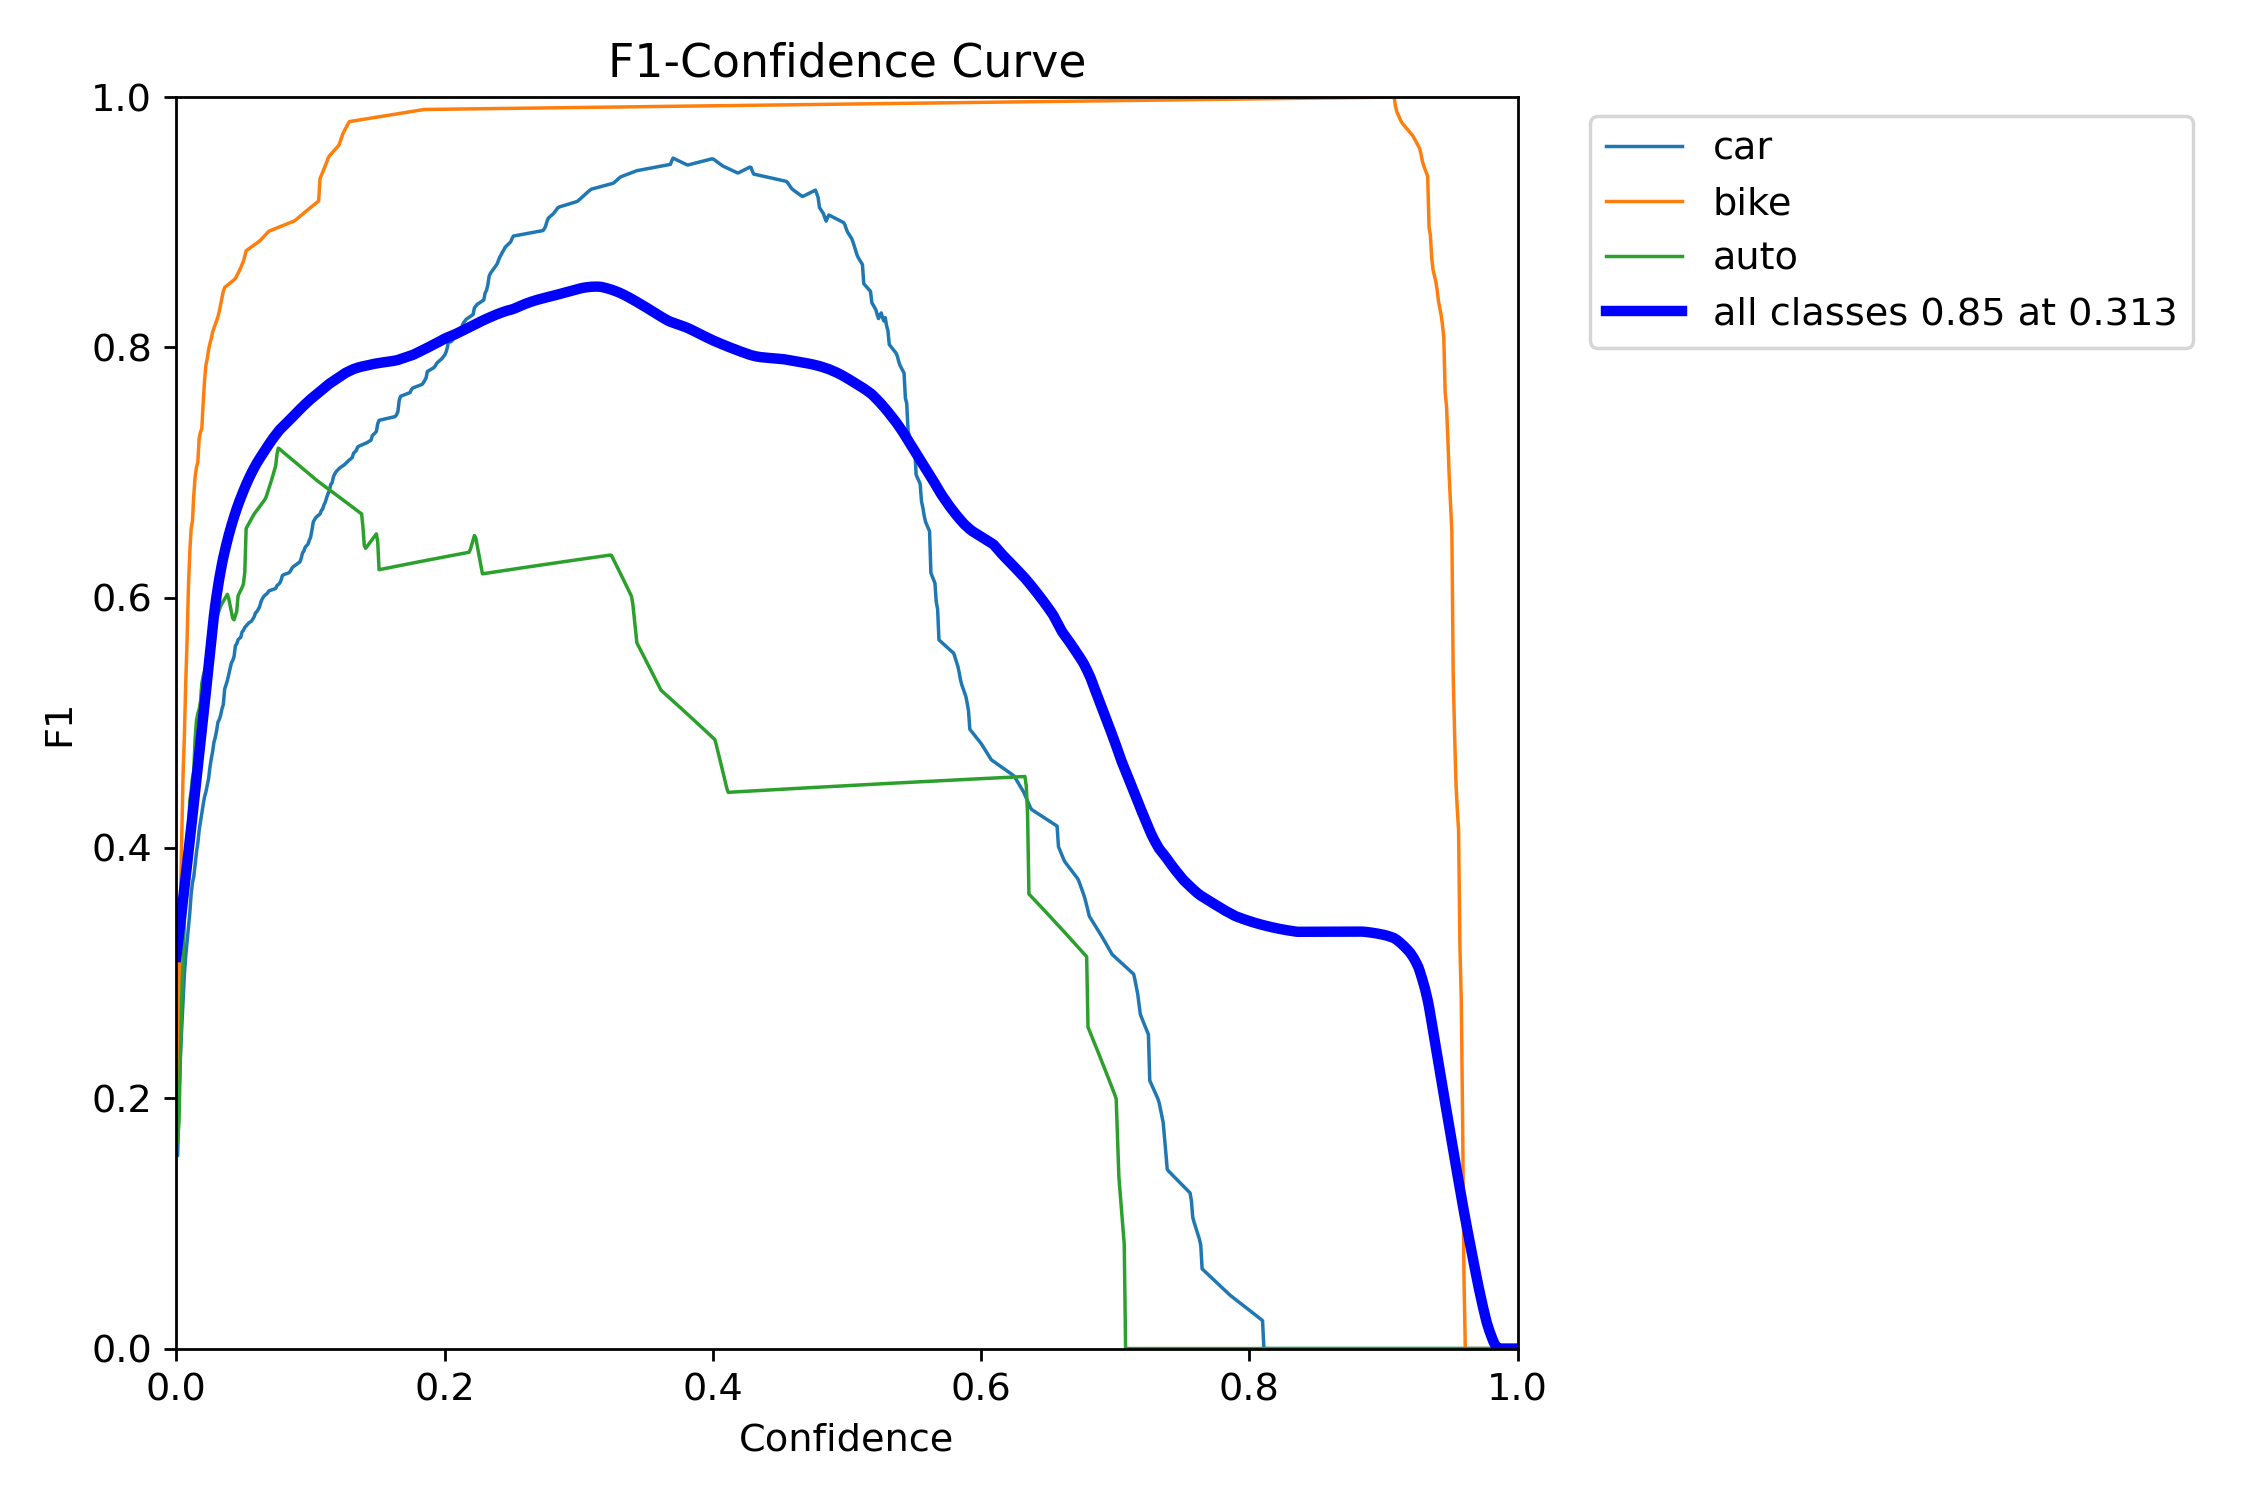

In [22]:
Image.open("/kaggle/working/yolo(rainny-day)/F1_curve.png")

In [23]:
model_rainny_day = YOLO("/kaggle/working/yolo(rainny-day)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg: 640x640 2 cars, 1 bike, 1 auto, 37.5ms
Speed: 3.1ms preprocess, 37.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


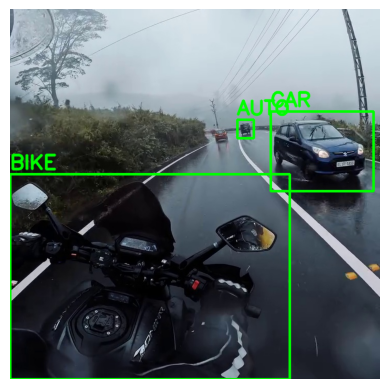

In [24]:
make_boxes(model_rainny_day,"/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg")

# YOLO Training on Rainny Night Conditions

In [25]:
from ultralytics import YOLO

model_rainny_night = YOLO('yolov8x.pt')
result=model_rainny_night.train(data='/kaggle/input/yolo-dataset/rainny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/rainny-night.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Rainny/Night... 650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:03<00:00, 185.27it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Rainny is not writeable, cache not saved.



train: Caching images (0.4GB RAM): 100%|██████████| 650/650 [00:03<00:00, 198.46it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 135.05it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



val: Caching images (0.0GB RAM): 100%|██████████| 50/50 [00:00<00:00, 124.44it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      16.6G      2.035      2.435      1.637        131        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50        237      0.884      0.903      0.936      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.7G      1.859      1.457        1.5        115        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         50        237      0.543      0.713      0.518      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.7G      1.831      1.328      1.505        102        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50        237      0.795      0.849      0.856      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.7G      1.849      1.232       1.51        182        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.629      0.885      0.691      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        15G      1.827      1.193      1.505        133        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50        237      0.883       0.85      0.858      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      14.7G      1.791      1.122       1.48        142        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.916      0.879      0.924      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.5G      1.786       1.11      1.469         68        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50        237      0.935      0.882      0.928      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      14.6G      1.738      1.038      1.458        132        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50        237      0.942      0.885      0.928      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.8G      1.716      1.004      1.449         85        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.943       0.95      0.972      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      14.6G      1.693     0.9586      1.421        133        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50        237      0.914      0.921      0.939      0.488


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.6G      1.726     0.9049      1.493         40        640: 100%|██████████| 41/41 [00:57<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.884      0.865      0.915      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      14.6G      1.682     0.8781      1.491         60        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50        237      0.914      0.868      0.933       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      14.8G      1.667     0.8444      1.476         50        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.941      0.931      0.962      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      14.6G      1.656     0.8108      1.465         48        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         50        237      0.947      0.909      0.946      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.6G      1.619     0.7693      1.434         68        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50        237      0.955      0.938      0.969      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      14.6G      1.621     0.7615      1.421         57        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50        237       0.96      0.919      0.966      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.8G      1.585     0.7214      1.424         61        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50        237      0.962      0.919      0.966      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      14.8G      1.563     0.6934      1.389         47        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50        237      0.945      0.937      0.971      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.7G      1.533     0.6845      1.378         59        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         50        237      0.972      0.929      0.973      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.6G      1.514     0.6694      1.351         34        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         50        237      0.965      0.938      0.977      0.544



20 epochs completed in 0.352 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]


                   all         50        237      0.947      0.904      0.969      0.497
                   car         50        207      0.926      0.841      0.949      0.513
                   bus         30         30      0.969      0.967      0.989      0.482
Speed: 0.1ms preprocess, 64.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train4


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▇▁▆▄▆▇▇▇█▇▇▇████████
metrics/mAP50-95(B),▄▁▅▃▆▆▇▇▆▇▆▆▇▇█▇▇▇▇▇
metrics/precision(B),▇▁▅▂▇▇▇██▇▇▇████████
metrics/recall(B),▇▁▅▆▅▆▆▆█▇▅▆▇▇█▇▇█▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▆▅▅▅▄▄▃▄▃▃▃▂▂▂▂▁▁


In [38]:
import shutil

source_path = "/kaggle/working/runs/detect/train4"

destination_path = "/kaggle/working/yolo(rainny-night)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(rainny-night)'

In [39]:
!pip install ultralytics

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

In [30]:
from ultralytics import YOLO

# Detection of Vehicles on Various Weather Conditions

Ensembling Technique was used to get accurate results from the 4 Yolo models

In [31]:
import gc
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
from collections import defaultdict

class ImageClassifierDetector:
    def __init__(self, yolo_models, img_path, threshold):
        self.yolo_models = yolo_models
        self.img_path = img_path
        self.threshold = threshold
        self.dn=0
        self.rs=0
    
    def make_predictions(self, model):
        image = image_utils.load_img(self.img_path, target_size=(224, 224))
        image = image_utils.img_to_array(image)
        image = image.reshape(1,224,224,3)
        image = preprocess_input(image)
        preds = model.predict(image)
        return preds 
    def contains_text(self, image, x1, y1):
        # Define the area where the text would be drawn
        text_width, text_height = 100, 30  # Assumed size of the text area
        y_start = max(0, int(y1) - text_height)
        y_end = int(y1)
        x_start = int(x1)
        x_end = int(x1) + text_width
        
        # Extract the region of interest (ROI)
        roi = image[y_start:y_end, x_start:x_end]

        # Define the green color range
        lower_green = np.array([0, 255, 0])
        upper_green = np.array([0, 255, 0])

        # Create a mask for green color
        mask = cv2.inRange(roi, lower_green, upper_green)
        
        # Check if there are any green pixels in the ROI
        green_pixels = cv2.countNonZero(mask)

        # Heuristic: if there are green pixels, assume the region contains text
        if green_pixels > 0:
            return True
        return False
    
    def draw_boxes(self, image, mp):
        for class_name, values in mp.items():      
            print(class_name, values)
            for value in values:
                x1, y1, x2, y2, score = value
                if score >= self.threshold:
                    if not self.contains_text(image,x1,y1-10):
                        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                        cv2.putText(image, class_name.upper(), (int(x1), int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    
    def make_boxes(self, models):
        image = cv2.imread(self.img_path)
        mp = defaultdict(list)
        for model in models:
            results = model(self.img_path)[0]
            z = []
            for result in results.boxes.data.tolist():
                x1, y1, x2, y2, score, class_id = result
                class_name = results.names[int(class_id)].lower()
                if(len(mp[class_name]) != 0):
                    v = mp[class_name]
                    if abs(v[-1][0] - x1) >= 6 and abs(v[-1][1] - y1) >= 6 and abs(v[-1][2] - x2) >= 6 and abs(v[-1][3]- y2)>=6:
                        mp[class_name].append([x1,y1,x2,y2,score])
                else:
                    mp[class_name].append([x1,y1,x2,y2,score])      
        self.draw_boxes(image, mp)
        # Convert the image from BGR to RGB for displaying
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
    def run_tf(self):
        model_day_night = tf.keras.models.load_model("day_night.h5")
        model_rainny_sunny = tf.keras.models.load_model("rainny_sunny.h5")
        dn = np.argmax(self.make_predictions(model_day_night))
        rs = np.argmax(self.make_predictions(model_rainny_sunny))
        f = open("dn_rs.txt", "w")
        f.write(f"{dn},{rs}")
        f.close()
        print(dn , rs)
    def run(self):
        p = multiprocessing.Process(target=self.run_tf)
        p.start()
        p.join()
        f=open("dn_rs.txt", "r")
        self.dn, self.rs = map(int, f.read().split(","))
        print(self.dn + self.rs)
        f.close()
        self.make_boxes([self.yolo_models[self.dn+self.rs], self.yolo_models[self.rs + (self.dn==0)]])

In [40]:
model_sunny_day = YOLO("/kaggle/working/yolo(sunny-day)/weights/best.pt")
model_sunny_night = YOLO("/kaggle/working/yolo(sunny-night)/weights/best.pt")
model_rainny_day = YOLO("/kaggle/working/yolo(rainny-day)/weights/best.pt")
model_rainny_night = YOLO("/kaggle/working/yolo(rainny-night)/weights/best.pt")

In [41]:
models = [model_rainny_day, model_rainny_night, model_sunny_day, model_sunny_night]

In [42]:
test = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg", threshold=0.5)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 1 car, 27.5ms
Speed: 4.5ms preprocess, 27.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 5 cars, 1 bus, 27.7ms
Speed: 2.7ms preprocess, 27.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
car [[712.45458984375, 830.2337036132812, 1080.0, 1026.21484375, 0.7361282110214233], [370.24151611328125, 812.757568359375, 447.13446044921875, 888.6088256835938, 0.5561642050743103], [312.45794677734375, 802.6411743164062, 382.0573425292969, 869.9657592773438, 0.2742781639099121]]
bus [[81.13595581054688, 738.6141357421875, 243.37142944335938, 842.268310546875, 0.7991776466369629]]


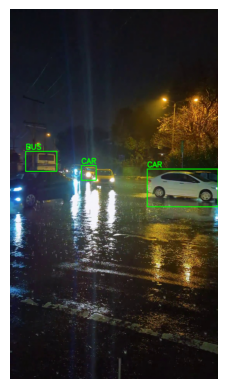

In [43]:
test.run()

In [44]:
test1 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (100).jpg", threshold = 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0 0
0

image 1/1 /kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (100).jpg: 640x576 1 car, 1 bike, 111.4ms
Speed: 4.5ms preprocess, 111.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (100).jpg: 640x576 2 cars, 37.4ms
Speed: 2.8ms preprocess, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)
bike [[0.0, 446.79144287109375, 472.1204833984375, 797.78857421875, 0.9637762308120728]]
car [[445.66156005859375, 352.2899169921875, 718.0, 587.0055541992188, 0.7941552400588989], [0.0, 438.5694274902344, 413.4340515136719, 819.749755859375, 0.6851449608802795]]


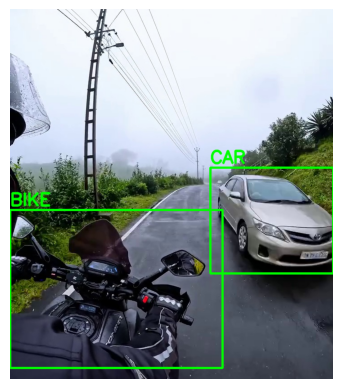

In [45]:
test1.run()

In [46]:
test2 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg", threshold = 0.1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1 1
2

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg: 384x640 9 cars, 1 taxi, 27.8ms
Speed: 2.4ms preprocess, 27.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg: 384x640 8 cars, 27.0ms
Speed: 1.6ms preprocess, 27.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
taxi [[434.4394226074219, 140.76296997070312, 640.0, 247.55197143554688, 0.861598014831543]]
car [[99.27706909179688, 88.05550384521484, 177.54489135742188, 147.62472534179688, 0.7789778709411621], [302.52734375, 66.52581787109375, 354.7171630859375, 126.64334106445312, 0.7571037411689758], [167.00308227539062, 85.39500427246094, 212.59573364257812, 134.91622924804688, 0.7232743501663208], [585.1417846679688, 58.542633056640625, 619.9409790039062, 91.95175170898438, 0.6832118630409241], [199.1258544921875

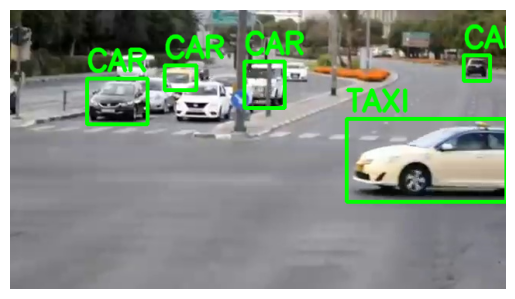

In [47]:
test2.run()

In [48]:
test3 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg", threshold=0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1 1
2

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg: 640x384 1 car, 1 bike, 27.5ms
Speed: 3.1ms preprocess, 27.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg: 640x384 1 car, 27.1ms
Speed: 2.1ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
bike [[469.84063720703125, 742.023193359375, 543.2526245117188, 851.3447265625, 0.7704298496246338]]
car [[560.8528442382812, 727.865966796875, 638.3513793945312, 804.70263671875, 0.6057398319244385]]


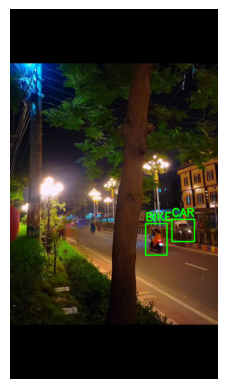

In [49]:
test3.run()